# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('../train_data.csv')
resource_data = pd.read_csv('../resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

## 1.2 preprocessing of `project_subject_categories`

In [5]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [6]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [7]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [8]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories           clean_subcategories  \
0             Literacy_Language                  ESL Literacy   
1  History_Civics Health_Sports  Civics_Government TeamSports   

                                               essay  
0  My students are English learners that are work...  
1  Our students arrive to our school eager to lea...

In [9]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [10]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

In [11]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [12]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations. \r\n\r\nThe materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills. \r\nThey also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing

In [13]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations.     The materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills.   They also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing. Phys

In [14]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays cognitive delays gross fine motor delays to autism They are eager beavers and always strive to work their hardest working past their limitations The materials we have are the ones I seek out for my students I teach in a Title I school where most of the students receive free or reduced price lunch Despite their disabilities and limitations my students love coming to school and come eager to learn and explore Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting This is how my kids feel all the time The want to be able to move as they learn or so they say Wobble chairs are the answer and I love then because they develop their core which enhances gross motor and in Turn fine motor skills They also want to learn through games my kids do not want to sit and do worksheets They want to learn to count by jumping and playing Physical engagement is the

In [15]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [16]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|████████████████████████████████████████████████████████████████████████| 109248/109248 [01:23<00:00, 1302.04it/s]


In [17]:
# after preprocesing
preprocessed_essays[20000]

'my kindergarten students varied disabilities ranging speech language delays cognitive delays gross fine motor delays autism they eager beavers always strive work hardest working past limitations the materials ones i seek students i teach title i school students receive free reduced price lunch despite disabilities limitations students love coming school come eager learn explore have ever felt like ants pants needed groove move meeting this kids feel time the want able move learn say wobble chairs answer i love develop core enhances gross motor turn fine motor skills they also want learn games kids not want sit worksheets they want learn count jumping playing physical engagement key success the number toss color shape mats make happen my students forget work fun 6 year old deserves nannan'

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [18]:

# similarly you can preprocess the titles also
preprocessed_project_title = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = sent.replace('!', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_project_title.append(sent.lower().strip())# similarly you can preprocess the titles also

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:03<00:00, 28304.08it/s]


## 1.5 Preparing data for models

In [19]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

In [20]:
# Combining two tables 

price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [21]:
project_data.columns


Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'price',
       'quantity'],
      dtype='object')

In [22]:
# Taking a sample of 30000 points from project data for analysis

X = project_data[0:50000]
y= X['project_is_approved'].values
X.drop(['project_is_approved'], axis=1, inplace=True)
X.drop(['project_title'], axis=1, inplace=True)
X['project_title'] = preprocessed_project_title[:50000]
print(X.shape ,y.shape)



(50000, 19) (50000,)


### 1. Splitting Data

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(33500, 19) (33500,)
(16500, 19) (16500,)


### 2. Creating Data Matrix

### 2.1 converting the text to vectors

#### BOW (Essay + Title)

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_essay_bow = CountVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)

vectorizer_essay_bow.fit(X_train['essay'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_bow = vectorizer_essay_bow.transform(X_train['essay'].values)
X_test_essay_bow = vectorizer_essay_bow.transform(X_test['essay'].values)

print("After vectorizations")
print(X_train_essay_bow.shape, y_train.shape)
print(X_test_essay_bow.shape, y_test.shape)


After vectorizations
(33500, 5000) (33500,)
(16500, 5000) (16500,)


In [25]:

vectorizer_title_bow = CountVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)

vectorizer_title_bow.fit(X_train['project_title'].values) # fit has to happen only on train data

# we use the fitted Countvectorizer_title_bow to convert the text to vector
X_train_title_bow = vectorizer_title_bow.transform(X_train['project_title'].values)
X_test_title_bow = vectorizer_title_bow.transform(X_test['project_title'].values)

print("After vectorizations")
print(X_train_title_bow.shape, y_train.shape)
print(X_test_title_bow.shape, y_test.shape)

After vectorizations
(33500, 2910) (33500,)
(16500, 2910) (16500,)


#### TFIDF (Essay + Title)

In [26]:

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_essay_tfidf = TfidfVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)

vectorizer_essay_tfidf.fit(X_train['essay'].values) # fit has to happen only on train data

# we use the fitted Countvectorizer_essay_tfidf to convert the text to vector
X_train_essay_tfidf = vectorizer_essay_tfidf.transform(X_train['essay'].values)
X_test_essay_tfidf = vectorizer_essay_tfidf.transform(X_test['essay'].values)

print("After vectorizations")
print(X_train_essay_tfidf.shape, y_train.shape)
print(X_test_essay_tfidf.shape, y_test.shape)



After vectorizations
(33500, 5000) (33500,)
(16500, 5000) (16500,)


In [27]:



vectorizer_title_tfidf = TfidfVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)

vectorizer_title_tfidf.fit(X_train['project_title'].values) # fit has to happen only on train data

# we use the fitted Countvectorizer_title_tfidf to convert the text to vector
X_train_title_tfidf = vectorizer_title_tfidf.transform(X_train['project_title'].values)
X_test_title_tfidf = vectorizer_title_tfidf.transform(X_test['project_title'].values)

print("After vectorizations")
print(X_train_title_tfidf.shape, y_train.shape)
print(X_test_title_tfidf.shape, y_test.shape)

After vectorizations
(33500, 2910) (33500,)
(16500, 2910) (16500,)


#### AVG W2V (Essay + Title)

In [28]:
with open('../glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [29]:
X_train_essay_avgw2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_train_essay_avgw2v.append(vector)

print(len(X_train_essay_avgw2v))
print(len(X_train_essay_avgw2v[0]))

print("*"*100)


X_test_essay_avgw2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_test_essay_avgw2v.append(vector)

print(len(X_test_essay_avgw2v))
print(len(X_test_essay_avgw2v[0]))

100%|██████████████████████████████████████████████████████████████████████████| 33500/33500 [00:19<00:00, 1740.08it/s]


33500
300
****************************************************************************************************


100%|██████████████████████████████████████████████████████████████████████████| 16500/16500 [00:09<00:00, 1757.44it/s]


16500
300


In [30]:
X_train_title_avgw2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_train_title_avgw2v.append(vector)

print(len(X_train_title_avgw2v))
print(len(X_train_title_avgw2v[0]))

print("*"*100)

X_test_title_avgw2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_test_title_avgw2v.append(vector)

print(len(X_test_title_avgw2v))
print(len(X_test_title_avgw2v[0]))

100%|█████████████████████████████████████████████████████████████████████████| 33500/33500 [00:00<00:00, 40383.42it/s]


33500
300
****************************************************************************************************


100%|█████████████████████████████████████████████████████████████████████████| 16500/16500 [00:00<00:00, 34755.22it/s]


16500
300


#### TFIDF W2V (Essay + Title)

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_model = TfidfVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
tfidf_model.fit(X_train['essay'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words_essay = set(tfidf_model.get_feature_names())

In [32]:
X_train_essay_tfidfw2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words_essay):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_train_essay_tfidfw2v.append(vector)

print(len(X_train_essay_tfidfw2v))
print(len(X_train_essay_tfidfw2v[0]))

X_test_essay_tfidfw2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words_essay):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_test_essay_tfidfw2v.append(vector)

print(len(X_test_essay_tfidfw2v))
print(len(X_test_essay_tfidfw2v[0]))

100%|███████████████████████████████████████████████████████████████████████████| 33500/33500 [03:12<00:00, 174.04it/s]


33500
300


100%|███████████████████████████████████████████████████████████████████████████| 16500/16500 [01:33<00:00, 176.53it/s]


16500
300


In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_model = TfidfVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
tfidf_model.fit(X_train['project_title'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words_title = set(tfidf_model.get_feature_names())

In [34]:
X_train_title_tfidfw2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words_title):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_train_title_tfidfw2v.append(vector)

print(len(X_train_title_tfidfw2v))
print(len(X_train_title_tfidfw2v[0]))

X_test_title_tfidfw2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words_title):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_test_title_tfidfw2v.append(vector)

print(len(X_test_title_tfidfw2v))
print(len(X_test_title_tfidfw2v[0]))

100%|█████████████████████████████████████████████████████████████████████████| 33500/33500 [00:02<00:00, 15125.54it/s]


33500
300


100%|█████████████████████████████████████████████████████████████████████████| 16500/16500 [00:01<00:00, 12938.41it/s]


16500
300


#### Vectoizing categorical features

In [35]:
vectorizer_school_state = CountVectorizer()
vectorizer_school_state.fit(X_train['school_state'].values) # fit has to happen only on train data

# we use the fitted Countvectorizer_school_state to convert the text to vector
X_train_state_ohe = vectorizer_school_state.transform(X_train['school_state'].values)
X_test_state_ohe = vectorizer_school_state.transform(X_test['school_state'].values)

print("After vectorizations")
print(X_train_state_ohe.shape, y_train.shape)
print(X_test_state_ohe.shape, y_test.shape)
print(vectorizer_school_state.get_feature_names())
print("="*100)

After vectorizations
(33500, 51) (33500,)
(16500, 51) (16500,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


In [36]:
vectorizer_categories = CountVectorizer()
vectorizer_categories.fit(X_train['clean_categories'].values) # fit has to happen only on train data

# we use the fitted Countvectorizer_categories to convert the text to vector
X_train_categories_ohe = vectorizer_categories.transform(X_train['clean_categories'].values)
X_test_categories_ohe = vectorizer_categories.transform(X_test['clean_categories'].values)

print("After vectorizations")
print(X_train_categories_ohe.shape, y_train.shape)
print(X_test_categories_ohe.shape, y_test.shape)
print(vectorizer_categories.get_feature_names())
print("="*100)

After vectorizations
(33500, 9) (33500,)
(16500, 9) (16500,)
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']


In [37]:
vectorizer_subcategories = CountVectorizer()
vectorizer_subcategories.fit(X_train['clean_subcategories'].values) # fit has to happen only on train data

# we use the fitted Countvectorizer_subcategories to convert the text to vector
X_train_subcategories_ohe = vectorizer_subcategories.transform(X_train['clean_subcategories'].values)
X_test_subcategories_ohe = vectorizer_subcategories.transform(X_test['clean_subcategories'].values)

print("After vectorizations")
print(X_train_subcategories_ohe.shape, y_train.shape)
print(X_test_subcategories_ohe.shape, y_test.shape)
print(vectorizer_subcategories.get_feature_names())
print("="*100)

After vectorizations
(33500, 30) (33500,)
(16500, 30) (16500,)
['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']


In [38]:
#Feature Encoding for teacher_prefix
#We have nan values of teacher prefix which is causing issues with count vectorizer_prefix
#Replaced the nan values with Mrs.

X_train['teacher_prefix'] =  X_train['teacher_prefix'].fillna('Mrs.')
X_test['teacher_prefix'] =  X_test['teacher_prefix'].fillna('Mrs.')
print(list(X_train['teacher_prefix'].value_counts()) , list(X_test['teacher_prefix'].value_counts()))

vectorizer_prefix = CountVectorizer()
vectorizer_prefix.fit(X_train['teacher_prefix'].values) # fit has to happen only on train data

# we use the fitted Countvectorizer_prefix to convert the text to vector
X_train_prefix_ohe = vectorizer_prefix.transform(X_train['teacher_prefix'].values)
X_test_prefix_ohe = vectorizer_prefix.transform(X_test['teacher_prefix'].values)

print("After vectorizations")
print(X_train_prefix_ohe.shape, y_train.shape)
print(X_test_prefix_ohe.shape, y_test.shape)
print(vectorizer_prefix.get_feature_names())
print("="*100)

[17520, 12030, 3237, 712, 1] [8622, 5906, 1622, 349, 1]
After vectorizations
(33500, 5) (33500,)
(16500, 5) (16500,)
['dr', 'mr', 'mrs', 'ms', 'teacher']


In [39]:
#Grade category is like this 'Grades 3-5'
#Converting it to'Grades_3_5 for one hot encoding
#If not converted it throws error

grade_category_processed = []
grade_category=[]
grade_category = X_train['project_grade_category']
for grade in grade_category:
    grade=grade.replace(" ","_")
    grade=grade.replace("-","_")
    grade_category_processed.append(grade)
print(len(grade_category_processed),project_data['project_grade_category'].shape)
print(grade_category_processed[5],project_data['project_grade_category'].values[5])


grade_category_processed1 = []
grade_category1=[]
grade_category1 = X_test['project_grade_category']
for grade in grade_category1:
    grade=grade.replace(" ","_")
    grade=grade.replace("-","_")
    grade_category_processed1.append(grade)
print(len(grade_category_processed1),project_data['project_grade_category'].shape)
print(grade_category_processed1[5],project_data['project_grade_category'].values[5])

X_train.drop(['project_grade_category'], axis=1, inplace=True)
X_train['project_grade_category'] = grade_category_processed

X_test.drop(['project_grade_category'], axis=1, inplace=True)
X_test['project_grade_category'] = grade_category_processed1



33500 (109248,)
Grades_9_12 Grades 3-5
16500 (109248,)
Grades_3_5 Grades 3-5


In [40]:
vectorizer_grade_category = CountVectorizer()
vectorizer_grade_category.fit(X_train['project_grade_category'].values) # fit has to happen only on train data

# we use the fitted Countvectorizer_grase_category to convert the text to vector
X_train_grade_ohe = vectorizer_grade_category.transform(X_train['project_grade_category'].values)
X_test_grade_ohe = vectorizer_grade_category.transform(X_test['project_grade_category'].values)

print("After vectorizations")
print(X_train_grade_ohe.shape, y_train.shape)
print(X_test_grade_ohe.shape, y_test.shape)
print(vectorizer_grade_category.get_feature_names())

print("="*100)

After vectorizations
(33500, 4) (33500,)
(16500, 4) (16500,)
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']


#### Normalizing Numerical Features

In [41]:
from sklearn.preprocessing import Normalizer
normalizer_price = Normalizer()
# normalizer_price.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer_price.fit(X_train['price'].values.reshape(-1,1))

X_train_price_norm = normalizer_price.transform(X_train['price'].values.reshape(-1,1))
X_test_price_norm = normalizer_price.transform(X_test['price'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
print(X_test_price_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(33500, 1) (33500,)
(16500, 1) (16500,)


In [42]:
from sklearn.preprocessing import Normalizer
normalizer_quantity = Normalizer()
# normalizer_quantity.fit(X_train['quantity'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer_quantity.fit(X_train['quantity'].values.reshape(-1,1))

X_train_quantity_norm = normalizer_quantity.transform(X_train['quantity'].values.reshape(-1,1))
X_test_quantity_norm = normalizer_quantity.transform(X_test['quantity'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_quantity_norm.shape, y_train.shape)
print(X_test_quantity_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(33500, 1) (33500,)
(16500, 1) (16500,)


In [43]:
from sklearn.preprocessing import Normalizer
normalizer_prev_posted = Normalizer()
# normalizer_prev_posted.fit(X_train['prev_posted'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer_prev_posted.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

X_train_prev_posted_norm = normalizer_prev_posted.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_test_prev_posted_norm = normalizer_prev_posted.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_prev_posted_norm.shape, y_train.shape)
print(X_test_prev_posted_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(33500, 1) (33500,)
(16500, 1) (16500,)


In [44]:
#Testing the shape of all the encoded vectors

print(X_train_state_ohe.shape)
print(X_train_categories_ohe.shape)
print(X_train_subcategories_ohe.shape)
print(X_train_prefix_ohe.shape)
print(X_train_grade_ohe.shape)

print(X_train_price_norm.shape)
print(X_train_quantity_norm.shape)
print(X_train_prev_posted_norm.shape)


print(X_train_essay_bow.shape)
print(X_train_title_bow.shape)
print(X_train_essay_tfidf.shape)
print(X_train_title_tfidf.shape)

(33500, 51)
(33500, 9)
(33500, 30)
(33500, 5)
(33500, 4)
(33500, 1)
(33500, 1)
(33500, 1)
(33500, 5000)
(33500, 2910)
(33500, 5000)
(33500, 2910)


__ Computing Sentiment Scores__

In [45]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# import nltk
# nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

for_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm \
for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide range\
of techniques to help all my students succeed students in my class come from a variety of different backgrounds which makes\
for wonderful sharing of experiences and cultures including native americans our school is a caring community of successful \
learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners \
in my class love to work with hands on materials and have many different opportunities to practice a skill before it is\
mastered having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum\
montana is the perfect place to learn about agriculture and nutrition my students love to role play in our pretend kitchen\
in the early childhood classroom i have had several kids ask me can we try cooking with real food i will take their idea \
and create common core cooking lessons where we learn important math and writing concepts while cooking delicious healthy \
food for snack time my students will have a grounded appreciation for the work that went into making the food and knowledge \
of where the ingredients came from as well as how it is healthy for their bodies this project would expand our learning of \
nutrition and agricultural cooking recipes by having us peel our own apples to make homemade applesauce make our own bread \
and mix up healthy plants from our classroom garden in the spring we will also create our own cookbooks to be printed and \
shared with families students will gain math and literature skills as well as a life long enjoyment for healthy cooking \
nannan'
ss = sid.polarity_scores(for_sentiment)

for k in ss:
    print('{0}: {1}, '.format(k, ss[k]), end='')

# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93

C:\Users\user\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning:

The twython library has not been installed. Some functionality from the twitter package will not be available.



neg: 0.01, neu: 0.745, pos: 0.245, compound: 0.9975, 

# Assignment 8: DT

<ol>
    <li><strong>Apply Decision Tree Classifier(DecisionTreeClassifier) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning (best `depth` in range [1, 5, 10, 50, 100, 500, 100], and the best `min_samples_split` in range [5, 10, 100, 500])</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning</li> 
        </ul>
    </li>
    <br>
    <li><strong>Graphviz</strong>
        <ul>
    <li>Visualize your decision tree with Graphviz. It helps you to understand how a decision is being made, given a new vector.</li>
    <li>Since feature names are not obtained from word2vec related models, visualize only BOW & TFIDF decision trees using Graphviz</li>
    <li>Make sure to print the words in each node of the decision tree instead of printing its index.</li>
    <li>Just for visualization purpose, limit max_depth to 2 or 3 and either embed the generated images of graphviz in your notebook, or directly upload them as .png files.</li>                
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
    <li>Once after you plot the confusion matrix with the test data, get all the `false positive data points`
        <ul>
            <li> Plot the WordCloud <a href='https://www.geeksforgeeks.org/generating-word-cloud-python/' with the words of eassy text of these `false positive data points`>WordCloud</a></li>
            <li> Plot the box plot with the `price` of these `false positive data points`</li>
            <li> Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`</li>
        </ul>
        </ul>
    </li>
    <br>
    <li><strong>[Task-2]</strong>
        <ul>
    <li> Select 5k best features from features of <font color='red'>Set 2</font> using<a href='https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html'>`feature_importances_`</a>, discard all the other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM), you need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3</li>
        </ul>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h1>2. Decision Tree </h1>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [46]:
# Done in above cells

<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

In [47]:
# Done in above cells

<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

#### Merging all the features

In [48]:
# Train data


from scipy.sparse import hstack
X_train_bow = hstack((X_train_state_ohe , X_train_categories_ohe, X_train_subcategories_ohe , X_train_prefix_ohe, X_train_grade_ohe, \
                    X_train_price_norm, X_train_quantity_norm , X_train_prev_posted_norm ,\
                    X_train_essay_bow , X_train_title_bow)).tocsr()


X_train_tfidf = hstack((X_train_state_ohe , X_train_categories_ohe, X_train_subcategories_ohe , X_train_prefix_ohe, X_train_grade_ohe ,\
                    X_train_price_norm, X_train_quantity_norm , X_train_prev_posted_norm , \
                    X_train_essay_tfidf , X_train_title_tfidf)).tocsr()
                
X_train_avg_w2v = hstack((X_train_state_ohe , X_train_categories_ohe, X_train_subcategories_ohe , X_train_prefix_ohe, X_train_grade_ohe ,\
                    X_train_price_norm, X_train_quantity_norm , X_train_prev_posted_norm ,\
                    X_train_essay_avgw2v, X_train_title_avgw2v)).tocsr()

X_train_tfidf_w2v = hstack((X_train_state_ohe , X_train_categories_ohe, X_train_subcategories_ohe , X_train_prefix_ohe, X_train_grade_ohe, \
                    X_train_price_norm, X_train_quantity_norm , X_train_prev_posted_norm, \
                    X_train_essay_tfidfw2v, X_train_title_tfidfw2v)).tocsr()

print(X_train_bow.shape)
print(X_train_tfidf.shape)
print(X_train_avg_w2v.shape)
print(X_train_tfidf_w2v.shape)

(33500, 8012)
(33500, 8012)
(33500, 702)
(33500, 702)


In [49]:

# Test Data

from scipy.sparse import hstack
X_test_bow = hstack((X_test_state_ohe , X_test_categories_ohe, X_test_subcategories_ohe , X_test_prefix_ohe, X_test_grade_ohe, \
                    X_test_price_norm, X_test_quantity_norm , X_test_prev_posted_norm ,\
                    X_test_essay_bow , X_test_title_bow)).tocsr()


X_test_tfidf = hstack((X_test_state_ohe , X_test_categories_ohe, X_test_subcategories_ohe , X_test_prefix_ohe, X_test_grade_ohe ,\
                    X_test_price_norm, X_test_quantity_norm , X_test_prev_posted_norm , \
                    X_test_essay_tfidf , X_test_title_tfidf)).tocsr()
                
X_test_avg_w2v = hstack((X_test_state_ohe , X_test_categories_ohe, X_test_subcategories_ohe , X_test_prefix_ohe, X_test_grade_ohe ,\
                    X_test_price_norm, X_test_quantity_norm , X_test_prev_posted_norm ,\
                    X_test_essay_avgw2v, X_test_title_avgw2v)).tocsr()

X_test_tfidf_w2v = hstack((X_test_state_ohe , X_test_categories_ohe, X_test_subcategories_ohe , X_test_prefix_ohe, X_test_grade_ohe, \
                    X_test_price_norm, X_test_quantity_norm , X_test_prev_posted_norm, \
                    X_test_essay_tfidfw2v, X_test_title_tfidfw2v)).tocsr()

print(X_test_bow.shape)
print(X_test_tfidf.shape)
print(X_test_avg_w2v.shape)
print(X_test_tfidf_w2v.shape)

(16500, 8012)
(16500, 8012)
(16500, 702)
(16500, 702)


In [50]:
# Checking the type of test and train data

print(type(X_train_bow))
print(type(X_test_bow))

<class 'scipy.sparse.csr.csr_matrix'>
<class 'scipy.sparse.csr.csr_matrix'>


### 2.4.1 Applying Decision Trees on BOW,<font color='red'> SET 1</font>

In [52]:
# Please write all the code with proper documentation


from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc

DT =  DecisionTreeClassifier(class_weight = 'balanced')
#Performing Naive Bayes using gridsearchcv
parameters = {'max_depth':[1, 5, 10, 50, 100, 500, 100] , 'min_samples_split':[5,10,100,500]}

model = GridSearchCV(DT,parameters,cv=3,scoring='roc_auc')
model.fit(X_train_bow,y_train)


GridSearchCV(cv=3, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 5, 10, 50, 100, 500, 100], 'min_samples_split': [5, 10, 100, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [53]:
# Printing the best hyperparameter and AUC we get when we use obtained hyperparameter for building the model

print("Best HyperParameter from GridSearch: ",model.best_params_)
print("Best AUC Score: %.2f%%"%(model.best_score_*100))

optimal_max_depth_bow = model.best_params_['max_depth']
print(optimal_max_depth_bow)



Best HyperParameter from GridSearch:  {'max_depth': 10, 'min_samples_split': 500}
Best AUC Score: 60.97%
10


In [54]:
#Plotting the AUC for Train and CV for Various hyperparameter

train_auc_bow= model.cv_results_['mean_train_score']

cv_auc_bow = model.cv_results_['mean_test_score'] 


# since we are using both hyperparameter 'min_samples_split' and 'max_depth' in parameter grid for GridserachCV
# we get 4 values for each hyperparameter max_depth . one each for min_samples_split = [ 5, 10, 100, 500](len of list is 4) respectively
# we will get keys of param_grid in sorted order and cross product of values is taken (so max_deth each value is checked against
# each value of min_samples_split)

# Reshaping to form a matrix of 4 columns(min_samples_split) and 7 rows(max_depth)
train_auc_matrix = train_auc_bow.reshape(7,4)
cv_auc_matrix =    cv_auc_bow.reshape(7,4)


print(train_auc_matrix.shape, cv_auc_matrix.shape)

print(type(train_auc_matrix) ,  type(cv_auc_matrix))

# Rounding the values in the matrix to two decimal points
train_auc_matrix = np.matrix.round(train_auc_matrix ,3)
cv_auc_matrix = np.matrix.round(cv_auc_matrix ,3)


# plotting the graphs
# Y-axis = max_depth
# X-axis = min_samples_split

plt.figure(figsize=(15,5))

df_train =  pd.DataFrame(data = train_auc_matrix , columns =parameters['min_samples_split'] , index=parameters['max_depth'])
plt.subplot(1,2,1)
plt.ylabel('max_depth')
plt.xlabel('min_samples_split')
plt.title("Train AUC Heatmap")
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_train, annot=True,annot_kws={"size": 16}, fmt='g' , xticklabels =True ,yticklabels =True)


df_cv =  pd.DataFrame(data = cv_auc_matrix , columns =parameters['min_samples_split'] , index=parameters['max_depth'])
plt.subplot(1,2,2)
plt.ylabel('max_depth')
plt.xlabel('min_samples_split')
plt.title("Test AUC Heatmap")
sns.set(font_scale=1.4)#for label size

fig =sns.heatmap(df_cv, annot=True,annot_kws={"size": 16}, fmt='g', xticklabels =True ,yticklabels =True)

plt.show()



(7, 4) (7, 4)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


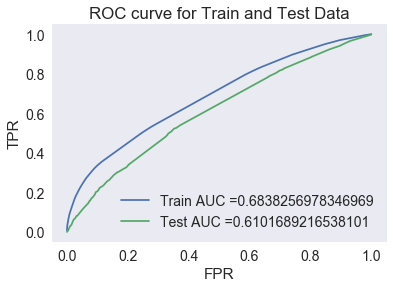

In [55]:
import math

clf = DecisionTreeClassifier(class_weight = 'balanced',max_depth=optimal_max_depth_bow , min_samples_split=500)
clf.fit(X_train_bow, y_train)


# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

# y_train_pred = batch_predict_proba(neigh, X_train_bow)    
# y_test_pred = batch_predict_proba(neigh, X_test_bow)

y_train_pred = clf.predict_proba(X_train_bow)[:,1]
y_test_pred = clf.predict_proba(X_test_bow)[:,1]



train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC curve for Train and Test Data")
plt.grid()
plt.show()


##### AUC score for test data is 0.610

In [56]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshold, fpr, tpr):
    
    t = threshold[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [57]:
print("="*100)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

custom_predict_train  = predict(y_train_pred, train_thresholds, train_fpr, train_tpr)

print("Classification Report: \n")
print(classification_report(y_train, custom_predict_train))
print("Confusion Matrix of train set:\n [ [TN  FP]\n [FN TP] ]\n")

print(confusion_matrix(y_train, custom_predict_train))

# https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
df_cm = pd.DataFrame(confusion_matrix(y_train, custom_predict_train), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')


the maximum value of tpr*(1-fpr) 0.3860888231382078 for threshold 0.466
Classification Report: 

             precision    recall  f1-score   support

          0       0.22      0.70      0.34      5168
          1       0.91      0.55      0.69     28332

avg / total       0.80      0.57      0.63     33500

Confusion Matrix of train set:
 [ [TN  FP]
 [FN TP] ]

[[ 3631  1537]
 [12763 15569]]


the maximum value of tpr*(1-fpr) 0.3388022715417428 for threshold 0.466
Classification Report: 

             precision    recall  f1-score   support

          0       0.20      0.63      0.30      2546
          1       0.89      0.54      0.67     13954

avg / total       0.78      0.55      0.61     16500

Confusion Matrix of test set:
 [ [TN  FP]
 [FN TP] ]

[[1597  949]
 [6417 7537]]


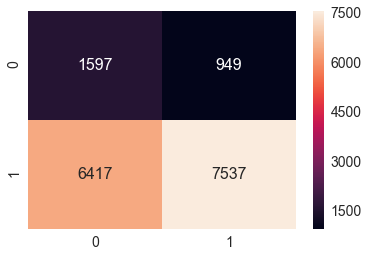

In [58]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

custom_predict_test  = predict(y_test_pred, test_thresholds, test_fpr, test_tpr)

print("Classification Report: \n")
print(classification_report(y_test, custom_predict_test))
print("Confusion Matrix of test set:\n [ [TN  FP]\n [FN TP] ]\n")

print(confusion_matrix(y_test, custom_predict_test))

# https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
df_cm = pd.DataFrame(confusion_matrix(y_test, custom_predict_test), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

#### Debugging the FalsePositive points and analysing them

In [59]:

# storing all the false positive indexes
FP_index = []

for i in range(X_test_bow.shape[0]):
    if( y_test[i] == 0 and custom_predict_test[i] == 1 ):
        FP_index.append(i)
    
print(len(FP_index),X_test_bow.shape[0])


949 16500


In [60]:
# slicing the dataset based on the list of indexes using iloc

X_test_bow_fp = X_test.iloc[FP_index]

print(X_test_bow_fp.shape)

(949, 19)


In [61]:
X_test_bow_fp.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_essay_1', 'project_essay_2',
       'project_essay_3', 'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'clean_categories',
       'clean_subcategories', 'essay', 'price', 'quantity', 'project_title',
       'project_grade_category'],
      dtype='object')

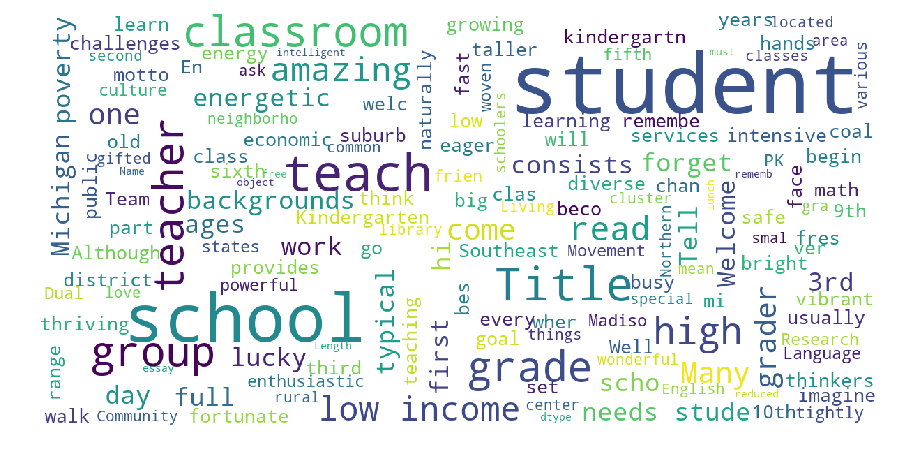

In [62]:
# https://stackoverflow.com/questions/16645799/how-to-create-a-word-cloud-from-a-corpus-in-python

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(X_test_bow_fp['essay'])



##### Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance

#####  Significant textual data points can be highlighted using a word cloud

##### Words which are effecting the model to deliver FalsePositive points are : Students , classroom , teacher , school , diverse etc

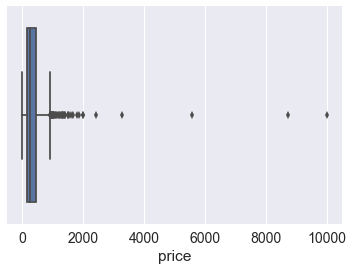

In [63]:
sns.boxplot(x=X_test_bow_fp['price'])
plt.show()

##### 75% of FalsePositive points have price <400

[0.96206533 0.02212856 0.00737619 0.00421496 0.00421496]
[  0.   42.2  84.4 126.6 168.8 211. ]


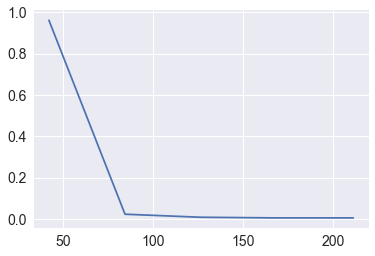

In [64]:

counts, bin_edges = np.histogram(X_test_bow_fp['teacher_number_of_previously_posted_projects'], bins=5, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);

##### observations from pdf

1) Almost 96% of teachers posted '0' projects

2) 4% of teachers only posted previously

In [65]:
### Shape of all the encoded vectors#Testing the shape of all the encoded vectors

print(X_train_state_ohe.shape)
print(X_train_categories_ohe.shape)
print(X_train_subcategories_ohe.shape)
print(X_train_prefix_ohe.shape)
print(X_train_grade_ohe.shape)

print(X_train_price_norm.shape)
print(X_train_quantity_norm.shape)
print(X_train_prev_posted_norm.shape)


print(X_train_essay_bow.shape)
print(X_train_title_bow.shape)
print(X_train_essay_tfidf.shape)
print(X_train_title_tfidf.shape)

(33500, 51)
(33500, 9)
(33500, 30)
(33500, 5)
(33500, 4)
(33500, 1)
(33500, 1)
(33500, 1)
(33500, 5000)
(33500, 2910)
(33500, 5000)
(33500, 2910)


In [66]:



# Size of each of the vectorized/normalized features

index_bow = np.array([ X_train_state_ohe.shape[1] ,X_train_categories_ohe.shape[1] , X_train_subcategories_ohe.shape[1], \
                 X_train_prefix_ohe.shape[1] , X_train_grade_ohe.shape[1] , X_train_price_norm.shape[1] , X_train_quantity_norm.shape[1], \
                 X_train_prev_posted_norm.shape[1] , X_train_essay_bow.shape[1] ,X_train_title_bow.shape[1] ])

# Cumilative sum which is used for indexing
# Ex: a = [1,2,3,4,5]
# np.cumsum(a)  => [1,,3,6,10,15]
index_list_bow =  np.cumsum(index_bow)
print(index_list_bow)




[  51   60   90   95   99  100  101  102 5102 8012]


In [67]:
# Getting Feature names based on the index obtained for each feature
# As we used hstack to stack all the features we are finding the size of each feature we stacked 
# (Refer block: "Shape of all the encoded vectors") for finding size of all the feature we vectorized/normalized

def get_feature_names_bow(i,index_list):
    
    if(i < index_list[0]):
        return vectorizer_school_state.get_feature_names()[i]
    
    elif(i< index_list[1]):
        return vectorizer_categories.get_feature_names()[i-index_list[0]]
    
    elif(i< index_list[2]):
        return vectorizer_subcategories.get_feature_names()[i-index_list[1]]
    
    elif(i< index_list[3]):
        return vectorizer_prefix.get_feature_names()[i-index_list[2]]
    
    elif(i< index_list[4]):
        return vectorizer_grade_category.get_feature_names()[i-index_list[3]]
    
    elif(i< index_list[5]): 
        return "price"
    
    elif(i< index_list[6]):
        return "quantity"
    
    elif(i< index_list[7]):
        return "prev_posted"
    
    elif(i< index_list[8]):
        return vectorizer_essay_bow.get_feature_names()[i-index_list[7]]
    
    else:
        return vectorizer_title_bow.get_feature_names()[i-index_list[8]]
        
        
    

In [68]:
# getting all the feature names
# index_list_bow[-1] gives the total number of features (last element of the 'index_list_bow' )

feature_names_bow = []


for i in range(index_list_bow[-1]):
    feature_names_bow.append(get_feature_names_bow(i,index_list_bow))

In [69]:
# Testing the feature name list

print(len(feature_names_bow),index_list_bow[-1])
print(feature_names_bow[:5])

8012 8012
['ak', 'al', 'ar', 'az', 'ca']


In [70]:
import pydotplus
from sklearn import tree
import collections

# https://pythonprogramminglanguage.com/decision-tree-visual-example/
# Visualize data
dot_data = tree.export_graphviz(clf,
                                feature_names=feature_names_bow,
                                out_file=None,
                                filled=True,
                                rounded=True,
                                max_depth = 3)

graph = pydotplus.graph_from_dot_data(dot_data)

colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

graph.write_jpg('BOW.jpg')




True

#### 2.4.1.1 Graphviz visualization of Decision Tree on BOW,<font color='red'> SET 1</font>

In [71]:
import pydotplus
from sklearn import tree
import collections

# https://pythonprogramminglanguage.com/decision-tree-visual-example/
# Visualize data
dot_data = tree.export_graphviz(clf,
                                feature_names=feature_names_bow,
                                out_file=None,
                                filled=True,
                                rounded=True,
                                max_depth = 3)

graph = pydotplus.graph_from_dot_data(dot_data)

colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

graph.write_jpg('BOW.jpg')




True

### 2.4.2 Applying Decision Trees on TFIDF,<font color='red'> SET 2</font>

In [72]:
# Please write all the code with proper documentation


from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc

DT =  DecisionTreeClassifier(class_weight = 'balanced')
#Performing Naive Bayes using gridsearchcv
parameters = {'max_depth':[1, 5, 10, 50, 100, 500, 100] , 'min_samples_split':[5,10,100,500]}

model_tfidf = GridSearchCV(DT,parameters,cv=3,scoring='roc_auc')
model_tfidf.fit(X_train_tfidf,y_train)


GridSearchCV(cv=3, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 5, 10, 50, 100, 500, 100], 'min_samples_split': [5, 10, 100, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [117]:
# Printing the best hyperparameter and AUC we get when we use obtained hyperparameter for building the model

print("Best HyperParameter from GridSearch: ",model_tfidf.best_params_)
print("Best AUC Score: %.2f%%"%(model_tfidf.best_score_*100))

optimal_max_depth_tfidf = model_tfidf.best_params_['max_depth']
print(optimal_max_depth_tfidf)


Best HyperParameter from GridSearch:  {'max_depth': 10, 'min_samples_split': 500}
Best AUC Score: 60.22%
10


In [74]:
#Plotting the AUC for Train and CV for Various hyperparameter

train_auc_tfidf= model.cv_results_['mean_train_score']

cv_auc_tfidf = model.cv_results_['mean_test_score'] 


# since we are using both hyperparameter 'min_samples_split' and 'max_depth' in parameter grid for GridserachCV
# we get 4 values for each hyperparameter max_depth . one each for min_samples_split = [ 5, 10, 100, 500](len of list is 4) respectively
# we will get keys of param_grid in sorted order and cross product of values is taken (so max_deth each value is checked against
# each value of min_samples_split)

# Reshaping to form a matrix of 4 columns(min_samples_split) and 7 rows(max_depth)
train_auc_matrix = train_auc_tfidf.reshape(7,4)
cv_auc_matrix =    cv_auc_tfidf.reshape(7,4)


print(train_auc_matrix.shape, cv_auc_matrix.shape)

print(type(train_auc_matrix) ,  type(cv_auc_matrix))

# Rounding the values in the matrix to two decimal points
train_auc_matrix = np.matrix.round(train_auc_matrix ,3)
cv_auc_matrix = np.matrix.round(cv_auc_matrix ,3)


# plotting the graphs
# Y-axis = max_depth
# X-axis = min_samples_split

plt.figure(figsize=(15,5))

df_train =  pd.DataFrame(data = train_auc_matrix , columns =parameters['min_samples_split'] , index=parameters['max_depth'])
plt.subplot(1,2,1)
plt.ylabel('max_depth')
plt.xlabel('min_samples_split')
plt.title("Train AUC Heatmap")
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_train, annot=True,annot_kws={"size": 16}, fmt='g' , xticklabels =True ,yticklabels =True)


df_cv =  pd.DataFrame(data = cv_auc_matrix , columns =parameters['min_samples_split'] , index=parameters['max_depth'])
plt.subplot(1,2,2)
plt.ylabel('max_depth')
plt.xlabel('min_samples_split')
plt.title("Test AUC Heatmap")
sns.set(font_scale=1.4)#for label size

fig =sns.heatmap(df_cv, annot=True,annot_kws={"size": 16}, fmt='g', xticklabels =True ,yticklabels =True)

plt.show()



(7, 4) (7, 4)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


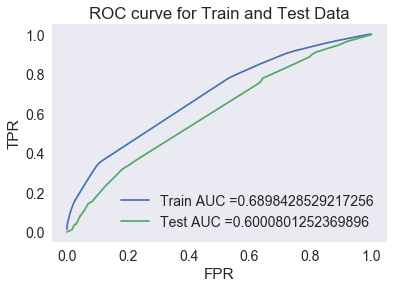

In [118]:
from sklearn.tree import DecisionTreeClassifier
import math

clf_tfidf = DecisionTreeClassifier(class_weight = 'balanced',max_depth=optimal_max_depth_tfidf , min_samples_split=500)
clf_tfidf.fit(X_train_tfidf, y_train)


# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

# y_train_pred = batch_predict_proba(neigh, X_train_tfidf)    
# y_test_pred = batch_predict_proba(neigh, X_test_tfidf)

y_train_pred = clf_tfidf.predict_proba(X_train_tfidf)[:,1]
y_test_pred = clf_tfidf.predict_proba(X_test_tfidf)[:,1]



train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC curve for Train and Test Data")
plt.grid()
plt.show()


##### AUC on test data is 0.600

the maximum value of tpr*(1-fpr) 0.36694873785355336 for threshold 0.501
Classification Report: 

             precision    recall  f1-score   support

          0       0.27      0.48      0.35      5168
          1       0.89      0.77      0.83     28332

avg / total       0.79      0.73      0.75     33500

Confusion Matrix of train set:
 [ [TN  FP]
 [FN TP] ]

[[ 2461  2707]
 [ 6500 21832]]


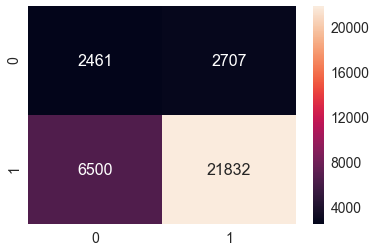

In [119]:
print("="*100)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

custom_predict_train  = predict(y_train_pred, train_thresholds, train_fpr, train_tpr)

print("Classification Report: \n")
print(classification_report(y_train, custom_predict_train))
print("Confusion Matrix of train set:\n [ [TN  FP]\n [FN TP] ]\n")

print(confusion_matrix(y_train, custom_predict_train))

# https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
df_cm = pd.DataFrame(confusion_matrix(y_train, custom_predict_train), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')


the maximum value of tpr*(1-fpr) 0.2795652441683318 for threshold 0.505
Classification Report: 

             precision    recall  f1-score   support

          0       0.18      0.77      0.29      2546
          1       0.90      0.36      0.51     13954

avg / total       0.79      0.42      0.48     16500

Confusion Matrix of test set:
 [ [TN  FP]
 [FN TP] ]

[[1973  573]
 [8920 5034]]


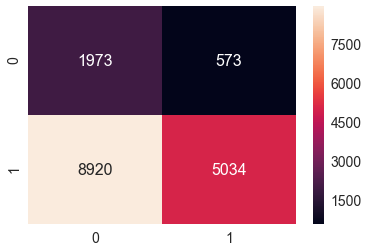

In [120]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

custom_predict_test  = predict(y_test_pred, test_thresholds, test_fpr, test_tpr)

print("Classification Report: \n")
print(classification_report(y_test, custom_predict_test))
print("Confusion Matrix of test set:\n [ [TN  FP]\n [FN TP] ]\n")

print(confusion_matrix(y_test, custom_predict_test))

# https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
df_cm = pd.DataFrame(confusion_matrix(y_test, custom_predict_test), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

#### Debugging the FalsePositive points and analysing them

In [121]:

# storing all the false positive indexes
FP_index_tfidf = []

for i in range(X_test_bow.shape[0]):
    if( y_test[i] == 0 and custom_predict_test[i] == 1 ):
        FP_index_tfidf.append(i)
    
print(len(FP_index_tfidf),X_test_bow.shape[0])


573 16500


In [122]:
# slicing the dataset based on the list of indexes using iloc

X_test_tfidf_fp = X_test.iloc[FP_index_tfidf]

print(X_test_tfidf_fp.shape)

(573, 19)


In [123]:
X_test_tfidf_fp.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_essay_1', 'project_essay_2',
       'project_essay_3', 'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'clean_categories',
       'clean_subcategories', 'essay', 'price', 'quantity', 'project_title',
       'project_grade_category'],
      dtype='object')

In [124]:
# https://stackoverflow.com/questions/16645799/how-to-create-a-word-cloud-from-a-corpus-in-python

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(X_test_tfidf_fp['essay'])



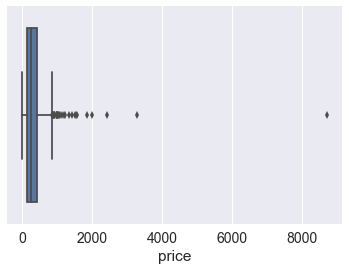

In [125]:
sns.boxplot(x=X_test_tfidf_fp['price'])
plt.show()

##### 75% of False Positive points have price <4000

[0.96335079 0.02443281 0.008726   0.         0.0034904 ]
[  0.   42.2  84.4 126.6 168.8 211. ]


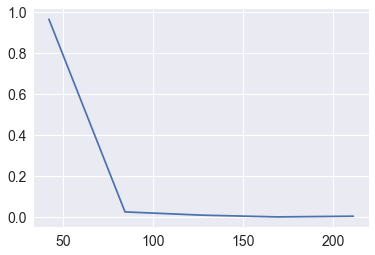

In [126]:

counts, bin_edges = np.histogram(X_test_tfidf_fp['teacher_number_of_previously_posted_projects'], bins=5, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);

##### observations from pdf

1) Almost 97% of teachers posted '0' projects

2) 3% of teachers only posted previously

In [127]:
### Shape of all the encoded vectors#Testing the shape of all the encoded vectors

print(X_train_state_ohe.shape)
print(X_train_categories_ohe.shape)
print(X_train_subcategories_ohe.shape)
print(X_train_prefix_ohe.shape)
print(X_train_grade_ohe.shape)

print(X_train_price_norm.shape)
print(X_train_quantity_norm.shape)
print(X_train_prev_posted_norm.shape)


print(X_train_essay_bow.shape)
print(X_train_title_bow.shape)
print(X_train_essay_tfidf.shape)
print(X_train_title_tfidf.shape)

(33500, 51)
(33500, 9)
(33500, 30)
(33500, 5)
(33500, 4)
(33500, 1)
(33500, 1)
(33500, 1)
(33500, 5000)
(33500, 2910)
(33500, 5000)
(33500, 2910)


In [128]:
# Please write all the code with proper documentation


# Size of each of the vectorized/normalized features

index_tfidf = np.array([ X_train_state_ohe.shape[1] ,X_train_categories_ohe.shape[1] , X_train_subcategories_ohe.shape[1], \
                 X_train_prefix_ohe.shape[1] , X_train_grade_ohe.shape[1] , X_train_price_norm.shape[1] , X_train_quantity_norm.shape[1], \
                 X_train_prev_posted_norm.shape[1] , X_train_essay_tfidf.shape[1] ,X_train_title_tfidf.shape[1] ])

# Cumilative sum which is used for indexing
# Ex: a = [1,2,3,4,5]
# np.cumsum(a)  => [1,,3,6,10,15]
index_list_tfidf =  np.cumsum(index_tfidf)
print(index_list_tfidf)




[  51   60   90   95   99  100  101  102 5102 8012]


In [129]:
# Getting Feature names based on the index obtained for each feature
# As we used hstack to stack all the features we are finding the size of each feature we stacked 
# (Refer block: "Shape of all the encoded vectors") for finding size of all the feature we vectorized/normalized

def get_feature_names_tfidf(i,index_list):
    
    if(i < index_list[0]):
        return vectorizer_school_state.get_feature_names()[i]
    
    elif(i< index_list[1]):
        return vectorizer_categories.get_feature_names()[i-index_list[0]]
    
    elif(i< index_list[2]):
        return vectorizer_subcategories.get_feature_names()[i-index_list[1]]
    
    elif(i< index_list[3]):
        return vectorizer_prefix.get_feature_names()[i-index_list[2]]
    
    elif(i< index_list[4]):
        return vectorizer_grade_category.get_feature_names()[i-index_list[3]]
    
    elif(i< index_list[5]): 
        return "price"
    
    elif(i< index_list[6]):
        return "quantity"
    
    elif(i< index_list[7]):
        return "prev_posted"
    
    elif(i< index_list[8]):
        return vectorizer_essay_tfidf.get_feature_names()[i-index_list[7]]
    
    else:
        return vectorizer_title_tfidf.get_feature_names()[i-index_list[8]]
        
        
    

In [130]:
feature_names_tfidf = []

for i in range(index_list_tfidf[-1]):
    feature_names_tfidf.append(get_feature_names_tfidf(i,index_list_tfidf))

In [88]:
# Please write all the code with proper documentation

#### 2.4.2.1 Graphviz visualization of Decision Tree on TFIDF,<font color='red'> SET 2</font>

In [132]:
import pydotplus
from sklearn import tree
import collections

# https://pythonprogramminglanguage.com/decision-tree-visual-example/
# Visualize data
dot_data = tree.export_graphviz(clf_tfidf,
                                feature_names=feature_names_bow,
                                out_file=None,
                                filled=True,
                                rounded=True,
                                max_depth = 3)

graph = pydotplus.graph_from_dot_data(dot_data)

colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

graph.write_jpg('TFIDF.jpg')




True

### 2.4.3 Applying Decision Trees on AVG W2V,<font color='red'> SET 3</font>

In [90]:
# Please write all the code with proper documentation


from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc

DT =  DecisionTreeClassifier(class_weight = 'balanced')
#Performing Naive Bayes using gridsearchcv
parameters = {'max_depth':[1, 5, 10, 50, 100, 500, 100] , 'min_samples_split':[5,10,100,500]}

model_avg_w2v = GridSearchCV(DT,parameters,cv=3,scoring='roc_auc')
model_avg_w2v.fit(X_train_avg_w2v,y_train)


GridSearchCV(cv=3, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 5, 10, 50, 100, 500, 100], 'min_samples_split': [5, 10, 100, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [91]:
# Printing the best hyperparameter and AUC we get when we use obtained hyperparameter for building the model

print("Best HyperParameter from GridSearch: ",model_avg_w2v.best_params_)
print("Best AUC Score: %.2f%%"%(model_avg_w2v.best_score_*100))

optimal_max_depth_avg_w2v = model_avg_w2v.best_params_['max_depth']
print(optimal_max_depth_avg_w2v)


Best HyperParameter from GridSearch:  {'max_depth': 5, 'min_samples_split': 500}
Best AUC Score: 57.60%
5


In [92]:
#Plotting the AUC for Train and CV for Various hyperparameter

train_auc_avg_w2v= model_avg_w2v.cv_results_['mean_train_score']

cv_auc_avg_w2v = model_avg_w2v.cv_results_['mean_test_score'] 


# since we are using both hyperparameter 'min_samples_split' and 'max_depth' in parameter grid for GridserachCV
# we get 4 values for each hyperparameter max_depth . one each for min_samples_split = [ 5, 10, 100, 500](len of list is 4) respectively
# we will get keys of param_grid in sorted order and cross product of values is taken (so max_deth each value is checked against
# each value of min_samples_split)

# Reshaping to form a matrix of 4 columns(min_samples_split) and 7 rows(max_depth)
train_auc_matrix = train_auc_avg_w2v.reshape(7,4)
cv_auc_matrix =    cv_auc_avg_w2v.reshape(7,4)


print(train_auc_matrix.shape, cv_auc_matrix.shape)

print(type(train_auc_matrix) ,  type(cv_auc_matrix))

# Rounding the values in the matrix to two decimal points
train_auc_matrix = np.matrix.round(train_auc_matrix ,3)
cv_auc_matrix = np.matrix.round(cv_auc_matrix ,3)


# plotting the graphs
# Y-axis = max_depth
# X-axis = min_samples_split

plt.figure(figsize=(15,5))

df_train =  pd.DataFrame(data = train_auc_matrix , columns =parameters['min_samples_split'] , index=parameters['max_depth'])
plt.subplot(1,2,1)
plt.ylabel('max_depth')
plt.xlabel('min_samples_split')
plt.title("Train AUC Heatmap")
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_train, annot=True,annot_kws={"size": 16}, fmt='g' , xticklabels =True ,yticklabels =True)


df_cv =  pd.DataFrame(data = cv_auc_matrix , columns =parameters['min_samples_split'] , index=parameters['max_depth'])
plt.subplot(1,2,2)
plt.ylabel('max_depth')
plt.xlabel('min_samples_split')
plt.title("Test AUC Heatmap")
sns.set(font_scale=1.4)#for label size

fig =sns.heatmap(df_cv, annot=True,annot_kws={"size": 16}, fmt='g', xticklabels =True ,yticklabels =True)

plt.show()



(7, 4) (7, 4)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


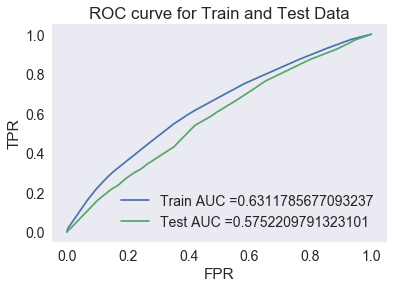

In [93]:
import math

clf = DecisionTreeClassifier(class_weight = 'balanced',max_depth=optimal_max_depth_avg_w2v , min_samples_split=500)
clf.fit(X_train_avg_w2v, y_train)


# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

# y_train_pred = batch_predict_proba(neigh, X_train_avg_w2v)    
# y_test_pred = batch_predict_proba(neigh, X_test_avg_w2v)

y_train_pred = clf.predict_proba(X_train_avg_w2v)[:,1]
y_test_pred = clf.predict_proba(X_test_avg_w2v)[:,1]



train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC curve for Train and Test Data")
plt.grid()
plt.show()


##### AUC obtained from Test data is 0.575

the maximum value of tpr*(1-fpr) 0.3575395717037568 for threshold 0.502
Classification Report: 

             precision    recall  f1-score   support

          0       0.21      0.60      0.31      5168
          1       0.89      0.60      0.72     28332

avg / total       0.79      0.60      0.65     33500

Confusion Matrix of train set:
 [ [TN  FP]
 [FN TP] ]

[[ 3088  2080]
 [11379 16953]]


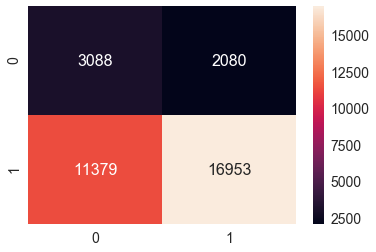

In [94]:
print("="*100)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

custom_predict_train  = predict(y_train_pred, train_thresholds, train_fpr, train_tpr)

print("Classification Report: \n")
print(classification_report(y_train, custom_predict_train))
print("Confusion Matrix of train set:\n [ [TN  FP]\n [FN TP] ]\n")

print(confusion_matrix(y_train, custom_predict_train))

# https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
df_cm = pd.DataFrame(confusion_matrix(y_train, custom_predict_train), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')


In [95]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

custom_predict_test  = predict(y_test_pred, test_thresholds, test_fpr, test_tpr)

print("Classification Report: \n")
print(classification_report(y_test, custom_predict_test))
print("Confusion Matrix of test set:\n [ [TN  FP]\n [FN TP] ]\n")

print(confusion_matrix(y_test, custom_predict_test))

# https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
df_cm = pd.DataFrame(confusion_matrix(y_test, custom_predict_test), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

the maximum value of tpr*(1-fpr) 0.31200507198998934 for threshold 0.504
Classification Report: 

             precision    recall  f1-score   support

          0       0.19      0.57      0.28      2546
          1       0.87      0.55      0.67     13954

avg / total       0.77      0.55      0.61     16500

Confusion Matrix of test set:
 [ [TN  FP]
 [FN TP] ]

[[1452 1094]
 [6320 7634]]


#### Debugging the FalsePositive points and analysing them

In [96]:

# storing all the false positive indexes
FP_index_avg_w2v = []

for i in range(X_test_avg_w2v.shape[0]):
    if( y_test[i] == 0 and custom_predict_test[i] == 1 ):
        FP_index_avg_w2v.append(i)
    
print(len(FP_index_avg_w2v),X_test_avg_w2v.shape[0])


1094 16500


In [97]:
# slicing the dataset based on the list of indexes using iloc

X_test_avg_w2v_fp = X_test.iloc[FP_index_avg_w2v]

print(X_test_avg_w2v_fp.shape)

(1094, 19)


In [98]:
X_test_avg_w2v_fp.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_essay_1', 'project_essay_2',
       'project_essay_3', 'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'clean_categories',
       'clean_subcategories', 'essay', 'price', 'quantity', 'project_title',
       'project_grade_category'],
      dtype='object')

In [99]:
# https://stackoverflow.com/questions/16645799/how-to-create-a-word-cloud-from-a-corpus-in-python

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(X_test_avg_w2v_fp['essay'])



In [100]:
sns.boxplot(x=X_test_avg_w2v_fp['price'])
plt.show()

##### 75% of FalsePositive points have price<400

[0.9606947  0.023766   0.00457038 0.00731261 0.00365631]
[  0.   42.2  84.4 126.6 168.8 211. ]


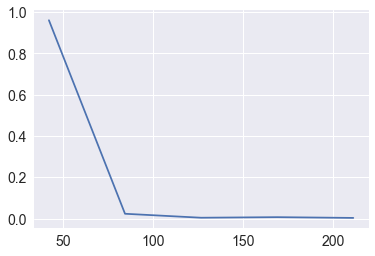

In [101]:

counts, bin_edges = np.histogram(X_test_avg_w2v_fp['teacher_number_of_previously_posted_projects'], bins=5, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);

##### observations from pdf

1) Almost 97% of teachers posted '0' projects

2) 3% of teachers only posted previously

### 2.4.4 Applying Decision Trees on TFIDF W2V,<font color='red'> SET 4</font>

In [102]:
# Please write all the code with proper documentation


from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc

DT =  DecisionTreeClassifier(class_weight = 'balanced')
#Performing Naive Bayes using gridsearchcv
parameters = {'max_depth':[1, 5, 10, 50, 100, 500, 100] , 'min_samples_split':[5,10,100,500]}

model_tfidf_w2v = GridSearchCV(DT,parameters,cv=3,scoring='roc_auc')
model_tfidf_w2v.fit(X_train_tfidf_w2v,y_train)


GridSearchCV(cv=3, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 5, 10, 50, 100, 500, 100], 'min_samples_split': [5, 10, 100, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [103]:
# Printing the best hyperparameter and AUC we get when we use obtained hyperparameter for building the model

print("Best HyperParameter from GridSearch: ",model_tfidf_w2v.best_params_)
print("Best AUC Score: %.2f%%"%(model_tfidf_w2v.best_score_*100))

optimal_max_depth_tfidf_w2v = model_tfidf_w2v.best_params_['max_depth']
print(optimal_max_depth_tfidf_w2v)


Best HyperParameter from GridSearch:  {'max_depth': 5, 'min_samples_split': 10}
Best AUC Score: 56.09%
5


##### Best hyperparameter obtained is 5

(7, 4) (7, 4)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


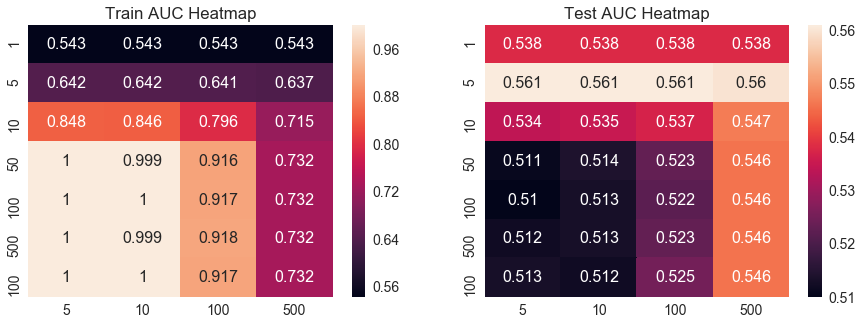

In [104]:
#Plotting the AUC for Train and CV for Various hyperparameter

train_auc_tfidf_w2v= model_tfidf_w2v.cv_results_['mean_train_score']

cv_auc_tfidf_w2v = model_tfidf_w2v.cv_results_['mean_test_score'] 


# since we are using both hyperparameter 'min_samples_split' and 'max_depth' in parameter grid for GridserachCV
# we get 4 values for each hyperparameter max_depth . one each for min_samples_split = [ 5, 10, 100, 500](len of list is 4) respectively
# we will get keys of param_grid in sorted order and cross product of values is taken (so max_deth each value is checked against
# each value of min_samples_split)

# Reshaping to form a matrix of 4 columns(min_samples_split) and 7 rows(max_depth)
train_auc_matrix = train_auc_tfidf_w2v.reshape(7,4)
cv_auc_matrix =    cv_auc_tfidf_w2v.reshape(7,4)


print(train_auc_matrix.shape, cv_auc_matrix.shape)

print(type(train_auc_matrix) ,  type(cv_auc_matrix))

# Rounding the values in the matrix to two decimal points
train_auc_matrix = np.matrix.round(train_auc_matrix ,3)
cv_auc_matrix = np.matrix.round(cv_auc_matrix ,3)


# plotting the graphs
# Y-axis = max_depth
# X-axis = min_samples_split

plt.figure(figsize=(15,5))

df_train =  pd.DataFrame(data = train_auc_matrix , columns =parameters['min_samples_split'] , index=parameters['max_depth'])
plt.subplot(1,2,1)
plt.ylabel('max_depth')
plt.xlabel('min_samples_split')
plt.title("Train AUC Heatmap")
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_train, annot=True,annot_kws={"size": 16}, fmt='g' , xticklabels =True ,yticklabels =True)


df_cv =  pd.DataFrame(data = cv_auc_matrix , columns =parameters['min_samples_split'] , index=parameters['max_depth'])
plt.subplot(1,2,2)
plt.ylabel('max_depth')
plt.xlabel('min_samples_split')
plt.title("Test AUC Heatmap")
sns.set(font_scale=1.4)#for label size

fig =sns.heatmap(df_cv, annot=True,annot_kws={"size": 16}, fmt='g', xticklabels =True ,yticklabels =True)

plt.show()



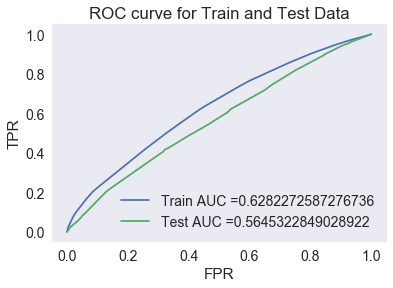

In [105]:
import math

clf = DecisionTreeClassifier(class_weight = 'balanced',max_depth=optimal_max_depth_tfidf_w2v , min_samples_split=500)
clf.fit(X_train_tfidf_w2v, y_train)


# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

# y_train_pred = batch_predict_proba(neigh, X_train_tfidf_w2v)    
# y_test_pred = batch_predict_proba(neigh, X_test_tfidf_w2v)

y_train_pred = clf.predict_proba(X_train_tfidf_w2v)[:,1]
y_test_pred = clf.predict_proba(X_test_tfidf_w2v)[:,1]



train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC curve for Train and Test Data")
plt.grid()
plt.show()


##### AUC for test data is 0.564

the maximum value of tpr*(1-fpr) 0.34931554600930403 for threshold 0.519
Classification Report: 

             precision    recall  f1-score   support

          0       0.21      0.56      0.31      5168
          1       0.89      0.62      0.73     28332

avg / total       0.78      0.61      0.66     33500

Confusion Matrix of train set:
 [ [TN  FP]
 [FN TP] ]

[[ 2918  2250]
 [10804 17528]]


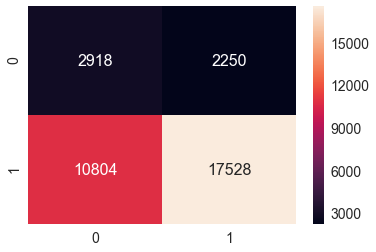

In [106]:
print("="*100)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

custom_predict_train  = predict(y_train_pred, train_thresholds, train_fpr, train_tpr)

print("Classification Report: \n")
print(classification_report(y_train, custom_predict_train))
print("Confusion Matrix of train set:\n [ [TN  FP]\n [FN TP] ]\n")

print(confusion_matrix(y_train, custom_predict_train))

# https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
df_cm = pd.DataFrame(confusion_matrix(y_train, custom_predict_train), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')


the maximum value of tpr*(1-fpr) 0.292320880153745 for threshold 0.539
Classification Report: 

             precision    recall  f1-score   support

          0       0.18      0.60      0.27      2546
          1       0.87      0.49      0.63     13954

avg / total       0.76      0.51      0.57     16500

Confusion Matrix of test set:
 [ [TN  FP]
 [FN TP] ]

[[1525 1021]
 [7144 6810]]


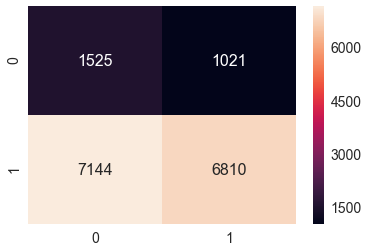

In [107]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

custom_predict_test  = predict(y_test_pred, test_thresholds, test_fpr, test_tpr)

print("Classification Report: \n")
print(classification_report(y_test, custom_predict_test))
print("Confusion Matrix of test set:\n [ [TN  FP]\n [FN TP] ]\n")

print(confusion_matrix(y_test, custom_predict_test))

# https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
df_cm = pd.DataFrame(confusion_matrix(y_test, custom_predict_test), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

#### Debugging the FalsePositive points and analysing them

In [108]:

# storing all the false positive indexes
FP_index_tfidf_w2v = []

for i in range(X_test_tfidf_w2v.shape[0]):
    if( y_test[i] == 0 and custom_predict_test[i] == 1 ):
        FP_index_tfidf_w2v.append(i)
    
print(len(FP_index_tfidf_w2v),X_test_tfidf_w2v.shape[0])


1021 16500


In [109]:
# slicing the dataset based on the list of indexes using iloc

X_test_tfidf_w2v_fp = X_test.iloc[FP_index_tfidf_w2v]

print(X_test_tfidf_w2v_fp.shape)

(1021, 19)


In [110]:
X_test_tfidf_w2v_fp.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_essay_1', 'project_essay_2',
       'project_essay_3', 'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'clean_categories',
       'clean_subcategories', 'essay', 'price', 'quantity', 'project_title',
       'project_grade_category'],
      dtype='object')

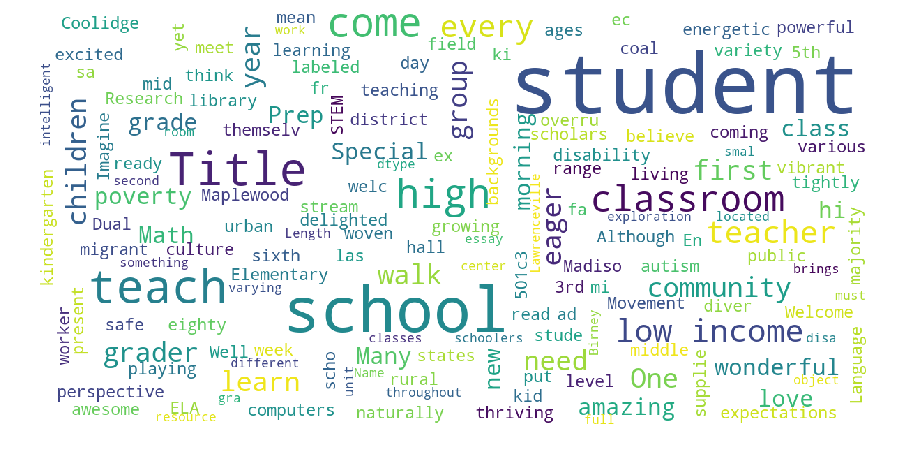

In [111]:
# https://stackoverflow.com/questions/16645799/how-to-create-a-word-cloud-from-a-corpus-in-python

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(X_test_tfidf_w2v_fp['essay'])



In [112]:
sns.boxplot(x=X_test_tfidf_w2v_fp['price'])
plt.show()

##### 75% of FalsePositive points have price<400

[0.96571988 0.02252693 0.00587659 0.00391773 0.00195886]
[  0.   37.2  74.4 111.6 148.8 186. ]


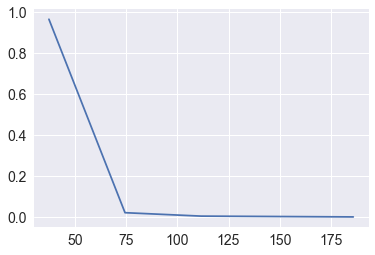

In [113]:

counts, bin_edges = np.histogram(X_test_tfidf_w2v_fp['teacher_number_of_previously_posted_projects'], bins=5, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);

##### observations from pdf

1) Almost 97% of teachers posted '0' projects

2) 3% of teachers only posted previously

<h2>2.5 Getting top 5k features using `feature_importances_`</h2>

In [114]:
# using set2 for selecting top 5k features 

In [133]:
features = clf_tfidf.feature_importances_

print(features.shape)
print(type(features))

# sort and reverse the obtained list
features_sorted = np.sort(features)[::-1]
# sort and reversee the obtained indexes
sorted_indexes  = np.argsort(features)[::-1]

print(features_sorted[:5])
print(sorted_indexes[:5])

# selecting first 5000 of the sorted indexes
index_list_5k = sorted_indexes[:5000]

print(index_list_5k[:5])

(8012,)
<class 'numpy.ndarray'>
[0.13766454 0.09324255 0.0547251  0.04459816 0.04355992]
[2495 3819  810  972 3617]
[2495 3819  810  972 3617]


In [135]:
X_train_tfidf_new = X_train_tfidf[:,index_list_5k]
X_test_tfidf_new = X_test_tfidf[:,index_list_5k]

print(X_train_tfidf.shape,X_train_tfidf_new.shape)

print(X_test_tfidf.shape,X_test_tfidf_new.shape)

(33500, 8012) (33500, 5000)
(16500, 8012) (16500, 5000)


In [136]:
# Please write all the code with proper documentation


from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc

from sklearn.linear_model import LogisticRegression

# our classifier
clf= LogisticRegression(class_weight='balanced')
#Hyper parameters in a  dict
parameters = [{'C':[10**-4,10**-3,10**-2,10**-1,10**0,10**1,10**2,10**3,10**4]}]

# hyperparameter tuning with grid serarchCV with metric roc_area under curve and cv=3
model_tfidf_new=GridSearchCV(clf,parameters,scoring='roc_auc',cv=3)
model_tfidf_new.fit(X_train_tfidf_new,y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [137]:
# Printing the best hyperparameter and AUC we get when we use obtained hyperparameter for building the model

print("Best HyperParameter from GridSearch: ",model_tfidf_new.best_params_)
print("Best AUC Score: %.2f%%"%(model_tfidf_new.best_score_*100))

optimal_C_tfidf_new = model_tfidf_new.best_params_['C']
print(optimal_C_tfidf_new)


Best HyperParameter from GridSearch:  {'C': 1}
Best AUC Score: 68.32%
1


##### Best hyperparameter obtained is 1 

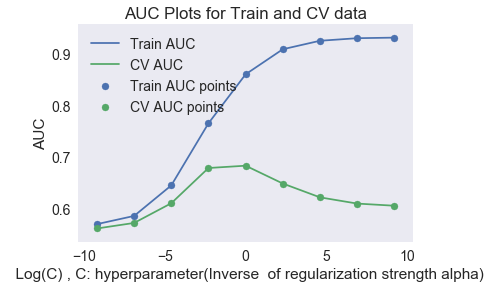

In [138]:
#Plotting the AUC for Train and CV for Various hyperparameter

train_auc_tfidf= model_tfidf_new.cv_results_['mean_train_score']

cv_auc_tfidf = model_tfidf_new.cv_results_['mean_test_score'] 



plt.plot(list(map(lambda x:math.log(x) ,parameters[0]['C'])), train_auc_tfidf, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
#plt.gca().fill_between(K,train_auc - train_auc_std,train_auc + train_auc_std,C=0.2,color='darkblue')

plt.plot(list(map(lambda x:math.log(x) ,parameters[0]['C'])), cv_auc_tfidf, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
#plt.gca().fill_between(K,cv_auc - cv_auc_std,cv_auc + cv_auc_std,C=0.2,color='darkorange')

plt.scatter(list(map(lambda x:math.log(x) ,parameters[0]['C'])), train_auc_tfidf, label='Train AUC points')
plt.scatter(list(map(lambda x:math.log(x) ,parameters[0]['C'])), cv_auc_tfidf, label='CV AUC points')

plt.legend()
plt.xlabel("  Log(C) , C: hyperparameter(Inverse  of regularization strength alpha)")
plt.ylabel("AUC")
plt.title("AUC Plots for Train and CV data")
plt.grid()
plt.show()

In [139]:
from sklearn.tree import DecisionTreeClassifier
import math

clf= LogisticRegression(C=optimal_C_tfidf_new , class_weight='balanced')
clf.fit(X_train_tfidf_new, y_train)


# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

# y_train_pred = batch_predict_proba(neigh, X_train_tfidf)    
# y_test_pred = batch_predict_proba(neigh, X_test_tfidf)

y_train_pred = clf.predict_proba(X_train_tfidf_new)[:,1]
y_test_pred = clf.predict_proba(X_test_tfidf_new)[:,1]



train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC curve for Train and Test Data")
plt.grid()
plt.show()


##### AUC for test data is 0.691

In [140]:
print("="*100)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

custom_predict_train  = predict(y_train_pred, train_thresholds, train_fpr, train_tpr)

print("Classification Report: \n")
print(classification_report(y_train, custom_predict_train))
print("Confusion Matrix of train set:\n [ [TN  FP]\n [FN TP] ]\n")

print(confusion_matrix(y_train, custom_predict_train))

# https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
df_cm = pd.DataFrame(confusion_matrix(y_train, custom_predict_train), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')


the maximum value of tpr*(1-fpr) 0.576688677627809 for threshold 0.487
Classification Report: 

             precision    recall  f1-score   support

          0       0.37      0.76      0.49      5168
          1       0.95      0.76      0.84     28332

avg / total       0.86      0.76      0.79     33500

Confusion Matrix of train set:
 [ [TN  FP]
 [FN TP] ]

[[ 3913  1255]
 [ 6753 21579]]


the maximum value of tpr*(1-fpr) 0.4151676797773764 for threshold 0.548
Classification Report: 

             precision    recall  f1-score   support

          0       0.25      0.66      0.36      2546
          1       0.91      0.63      0.75     13954

avg / total       0.81      0.64      0.69     16500

Confusion Matrix of test set:
 [ [TN  FP]
 [FN TP] ]

[[1674  872]
 [5143 8811]]


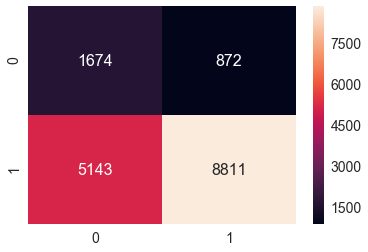

In [141]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

custom_predict_test  = predict(y_test_pred, test_thresholds, test_fpr, test_tpr)

print("Classification Report: \n")
print(classification_report(y_test, custom_predict_test))
print("Confusion Matrix of test set:\n [ [TN  FP]\n [FN TP] ]\n")

print(confusion_matrix(y_test, custom_predict_test))

# https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
df_cm = pd.DataFrame(confusion_matrix(y_test, custom_predict_test), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

#### Debugging the FalsePositive points and analysing them

In [142]:

# storing all the false positive indexes
FP_index_tfidf = []

for i in range(X_test_bow.shape[0]):
    if( y_test[i] == 0 and custom_predict_test[i] == 1 ):
        FP_index_tfidf.append(i)
    
print(len(FP_index_tfidf),X_test_bow.shape[0])


872 16500


In [143]:
# slicing the dataset based on the list of indexes using iloc

X_test_tfidf_fp = X_test.iloc[FP_index_tfidf]

print(X_test_tfidf_fp.shape)

(872, 19)


In [144]:
X_test_tfidf_fp.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_essay_1', 'project_essay_2',
       'project_essay_3', 'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'clean_categories',
       'clean_subcategories', 'essay', 'price', 'quantity', 'project_title',
       'project_grade_category'],
      dtype='object')

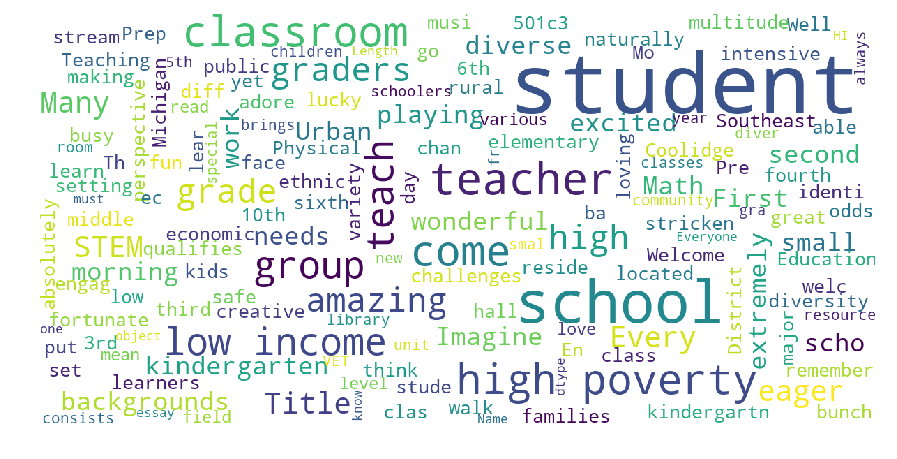

In [145]:
# https://stackoverflow.com/questions/16645799/how-to-create-a-word-cloud-from-a-corpus-in-python

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(X_test_tfidf_fp['essay'])



In [146]:
sns.boxplot(x=X_test_tfidf_fp['price'])
plt.show()

##### 75% of FalsePositive points have price<400

In [147]:

counts, bin_edges = np.histogram(X_test_tfidf_fp['teacher_number_of_previously_posted_projects'], bins=5, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);

[0.95527523 0.02866972 0.00917431 0.00344037 0.00344037]
[  0.   42.2  84.4 126.6 168.8 211. ]


##### observations from pdf

1) Almost 96% of teachers posted '0' projects

2) 3% of teachers only posted previously

<h1>3. Conclusion</h1>

In [148]:

from prettytable import PrettyTable

x= PrettyTable()

x.field_names = ["Vectorizer","Model","Hyper Parameter","AUC"]
x.add_row(["BagOfWords","Decision Tree",10,0.610])
x.add_row(["TFIDF","Decision Tree",10,0.60])
x.add_row(["Avg W2V","Decision Tree",5,0.575])
x.add_row(["TFIDF W2V","Decision Tree",5,0.564])
x.add_row(["Set 5","Logistic Regression",1,0.691])

print(x)


+------------+---------------------+-----------------+-------+
| Vectorizer |        Model        | Hyper Parameter |  AUC  |
+------------+---------------------+-----------------+-------+
| BagOfWords |    Decision Tree    |        10       |  0.61 |
|   TFIDF    |    Decision Tree    |        10       |  0.6  |
|  Avg W2V   |    Decision Tree    |        5        | 0.575 |
| TFIDF W2V  |    Decision Tree    |        5        | 0.564 |
|   Set 5    | Logistic Regression |        1        | 0.691 |
+------------+---------------------+-----------------+-------+


### Conclusions:


1) Decision Tree worked best on Feature set BOW with AUC = 0.610

2) Decision Tree did not perform well for Feature sets Avg W2V and Tfidf W2V

3) Logistic Regression is used on Feature set 5 which has best 5k features of Feature set TFIDF

4) Logistic Regression fared well on FeatureSet 5 with AUC = 0.691
